In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics as st

In [77]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

## Understanding the Hypothesis Testing


Step - 1:\
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ > \ < \neq $ \
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3: Compute Test Statistic:

* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:

* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$ Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

### Variance of Population is not known

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:<br>
Alternate Hypothesis (Bold claim): $$ H_1: \ \mu \neq 500 $$ Null Hypothesis (Status Quo): $$ H_0: \ \mu = 500 $$

Step - 2:
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: Two tailed t-test: $$ reject \ H_0 \ if \ t > t_{critical} $$

Step - 5.2: Compute p-value

In [78]:
sample1 = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sum(sample1)/len(sample1)

465.3

In [79]:
# Two tail - Calculating the t-critical value
confidence = 0.95
alpha = 1 - confidence

t_critical_1 = t.ppf(1-alpha/2, len(sample1)-1)
print(t_critical_1)

2.2621571627409915


In [80]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = st.stdev(sample1)
print(sample_std)

86.84859110991829


In [81]:
# Calculating the t-score

t_score1 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_score1)

-1.263475128444671


Text(465.3, 0.0007, 'x_bar')

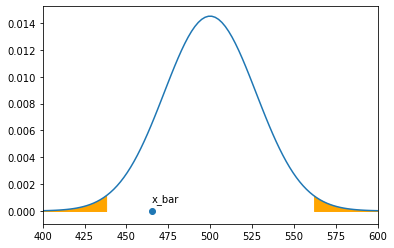

In [82]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical_1 * std)
t_critical_right = pop_mean + (t_critical_1 * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the rejection region
# i.e. here we fail to reject the Null Hypothesis

In [83]:
# Conclusion using t test

if(np.abs(t_score1) > t_critical_1):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [84]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_s)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18875957054112558
Fail to reject Null Hypothesis


#### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 

Step - 1:
Alternate Hypothesis (Bold claim): $$ H_1: \ \mu > 4 $$ Null Hypothesis (Status Quo): $$ H_0: \ \mu \leq 4 $$

Step - 2:
* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test: $$ reject \ H_0 \ if \ t > t_{critical} $$

Step - 5.2: Compute p-value

In [85]:
sample2 = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sum(sample2)/len(sample2)

4.25

In [86]:
# One tail - Calculating the t-critical value

confidence = 0.95
alpha = 1 - confidence

t_critical_2 = t.ppf(1-alpha,len(sample2)-1)
print(t_critical_2)

1.729132811521367


In [87]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = st.stdev(sample2)
print(sample_std)

0.8506963092234007


In [88]:
# Calculating the t-score

t_score2 = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_score2)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

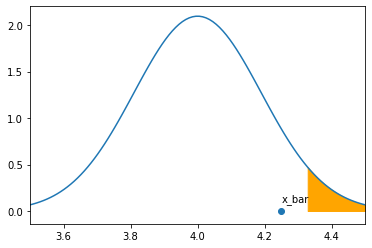

In [89]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical_2 * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [90]:
# Conclusion using t test

if(t_score2 > t_critical_2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [91]:
# Conclusion using p test

p_value2 = 1.0 - norm.cdf(np.abs(t_score2))

print("p_value = ", p_value2)

if(p_value2 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:
Alternate Hypothesis (Bold claim): $$ H_1: \ \mu > 15 $$ Null Hypothesis (Status Quo): $$ H_0: \ \mu \leq 15 $$

Step - 2:
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean  $$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test: $$ reject \ H_0 \ if \ t > t_{critical} $$

Step - 5.2: Compute p-value

In [92]:
sample3 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sum(sample3)/len(sample3)

15.098999999999998

In [93]:
# One tail - Calculating the t-critical value

confidence = 0.95
alpha = 1 - confidence

t_critical_3 = t.ppf(1-alpha, len(sample3)-1)
print(t_critical_3)

1.729132811521367


In [94]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = sum(sample3)/len(sample3)
pop_mean = 15
sample_std = st.stdev(sample3)
sample_std

1.0253671999517258

In [95]:
# Calculating the t-score

t_score3 = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_score3)

0.4317882018907915


Text(15.098999999999998, 0.1, 'x_bar')

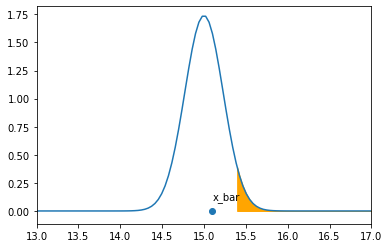

In [96]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical_3 * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [97]:
# Conclusion using t test

if(t_score3 > t_critical_3):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [98]:
# Conclusion using p test

p_value3 = 1.0 - norm.cdf(np.abs(t_score3))

print("p_value = ", p_value3)

if(p_value3 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33294767758235
Fail to reject Null Hypothesis


#### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

Step - 1:
Alternate Hypothesis (Bold claim): $$ H_1: \ \mu < 100 $$ Null Hypothesis (Status Quo): $$ H_0: \ \mu \geq 100 $$

Step - 2:
* Collect a sample of size n = 20 
* Compute sample mean  $$ \bar{x} = \frac{sum \ of \ sample}{n} $$

Step - 3: Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: One tailed t-test: $$ reject \ H_0 \ if \ t > t_{critical} $$

Step - 5.2: Compute p-value

In [99]:
sample4 = np.random.normal(loc=100, scale=2, size=20)

array([100.99578002,  99.3330312 ,  99.75794671,  99.3729968 ,
        97.9178525 ,  97.04305111,  99.7036233 , 101.91174956,
       101.75958457,  94.31421642,  99.553712  , 101.52821853,
       103.59340022, 101.35209204,  97.82658029,  99.72003922,
       101.50940595, 102.9439738 , 103.39051916, 100.86855193])

In [100]:
sum(sample4)/len(sample4)

100.21981626776203

In [101]:
# One tail

confidence = 0.99
alpha = 1 - confidence

t_critical_4 = t.ppf(1-alpha, len(sample4)-1)
print(t_critical_4)

2.539483190622288


In [102]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = sum(sample4)/len(sample4)
pop_mean = 100
sample_std = st.stdev(sample4)
print(sample_std)

2.2761957203646697


In [103]:
# Calculating the t-score

t_score4 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_score4)

0.43188212057392134


Text(100.21981626776203, 0.02, 'x_bar')

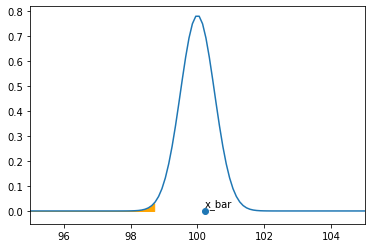

In [104]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical_4 * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [105]:
# Conclusion using t test

if(t_score4 > t_critical_4):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [106]:
# Conclusion using p test

p_value4 = 1.0 - norm.cdf(np.abs(t_score4))

print("p_value = ", p_value4)

if(p_value4 < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3329135450827435
Fail to reject Null Hypothesis
